# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [9]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend


## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [10]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.1354 - loss: 2.2864 - val_accuracy: 0.3306 - val_loss: 2.2460
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.2442 - loss: 2.2403 - val_accuracy: 0.5344 - val_loss: 2.1804
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.3565 - loss: 2.1764 - val_accuracy: 0.6571 - val_loss: 2.0928
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4457 - loss: 2.0896 - val_accuracy: 0.7075 - val_loss: 1.9726
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5116 - loss: 1.9708 - val_accuracy: 0.7372 - val_loss: 1.8087
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.5516 - loss: 1.8253 - val_accuracy: 0.7581 - val_loss: 1.6069
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5928 - loss: 1.6421 - val_accuracy: 0.7789 - val_loss: 1.3891
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.6259 - loss: 1.4592 - 

Training Images:


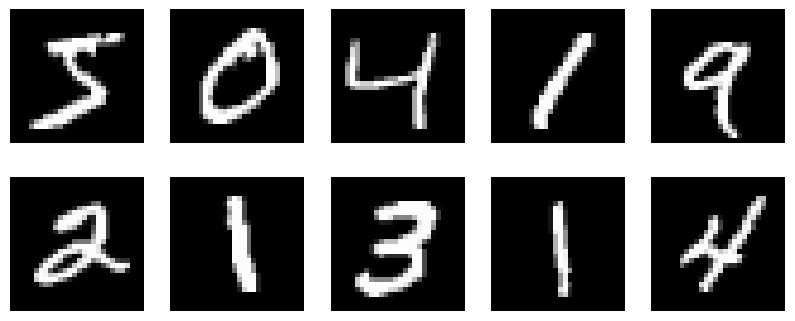

Training Images with Noise:


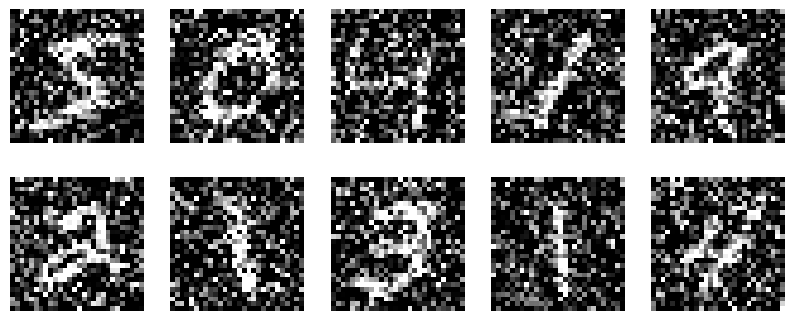

Testing Images:


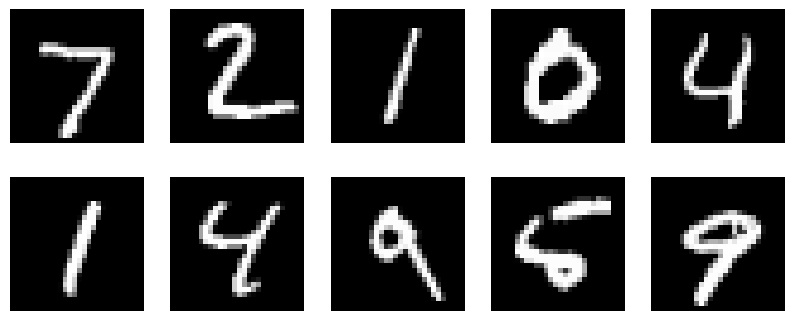

Testing Images with Noise:


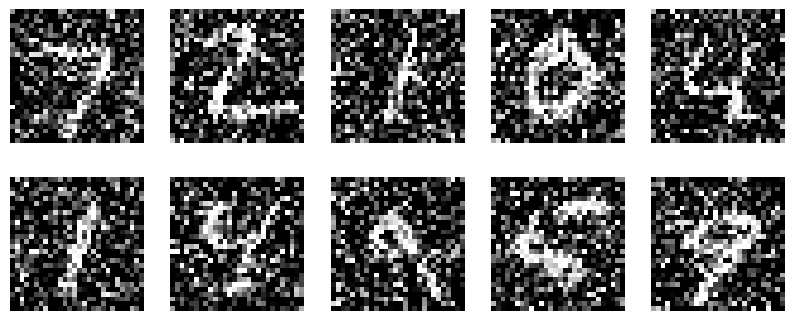

In [12]:
##Question #1

#Define noise value & add it to the images
noise = 0.5
noise_x_train = x_train + np.random.normal(loc=0.0, scale=noise, size=x_train.shape)
noise_x_test = x_test + np.random.normal(loc=0.0, scale=noise, size=x_test.shape)

#Normalization of pixel values between 0 and 1 & makes them floating point numbers
noise_x_train = np.clip(noise_x_train, 0., 1.)
noise_x_test = np.clip(noise_x_test, 0., 1.)

#Function to compare original vs noisy images
def original_noisy_images(images, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 2, nrows * 2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.show()

#Training Data - x_train vs noise_x_train
print("Training Images:")
original_noisy_images(x_train, 2, 5)
print("Training Images with Noise:")
original_noisy_images(noise_x_train, 2, 5)

#Testing Data - x_test vs. noise_x_test
print("Testing Images:")
original_noisy_images(x_test, 2, 5)
print("Testing Images with Noise:")
original_noisy_images(noise_x_test, 2, 5)


In [13]:
#Question #2

#Define parameters for batch_size, num_classes, and epochs
batch_size = 128
num_classes = 10
epochs = 12

#Noise function that adds noise to each image & normalizes the pixel values between 0 and 1 & makes them floating point numbers
def noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

#Create datasets with values that have been transformed to contain noise
noise_x_train = noise(x_train)
noise_x_test = noise(x_test)

#Define the model
def convolution_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    #Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    return model

#Clean data training + validation
clean_model = convolution_model(x_train.shape[1:], num_classes)
clean_history = clean_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

#Noisy data training + validation
noisy_model = convolution_model(noise_x_train.shape[1:], num_classes)
noisy_history = noisy_model.fit(noise_x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(noise_x_test, y_test))

#Evaluation of the results
print("Clean Data - Test loss:", clean_history.history['val_loss'][-1])
print("Clean Data - Test accuracy:", clean_history.history['val_accuracy'][-1])
print("Noisy Data - Test loss:", noisy_history.history['val_loss'][-1])
print("Noisy Data - Test accuracy:", noisy_history.history['val_accuracy'][-1])

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.1090 - loss: 2.3032 - val_accuracy: 0.2231 - val_loss: 2.2609
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.1998 - loss: 2.2550 - val_accuracy: 0.4036 - val_loss: 2.1988
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.3024 - loss: 2.1948 - val_accuracy: 0.5245 - val_loss: 2.1155
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.3920 - loss: 2.1127 - val_accuracy: 0.6266 - val_loss: 2.0002
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4590 - loss: 2.0025 - val_accuracy: 0.7007 - val_loss: 1.8426
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.5221 - loss: 1.8551 - val_accuracy: 0.7482 - val_loss: 1.6456
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5764 - loss: 1.6763 - val_accuracy: 0.7726 - val_loss: 1.4282
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6155 - loss: 1.4939 - 

In [14]:
print("""After introducing noise to the images, the model's accuracy fell down to 0.5875999927520752 while it's test loss was valued @ 2.139491319656372. This is significant considering the model performed realtively well with the clean data, with an accuracy of 0.8478000164031982 & test loss of 0.7287724018096924.""")

After introducing noise to the images, the model's accuracy fell down to 0.5875999927520752 while it's test loss was valued @ 2.139491319656372. This is significant considering the model performed realtively well with the clean data, with an accuracy of 0.8478000164031982 & test loss of 0.7287724018096924.


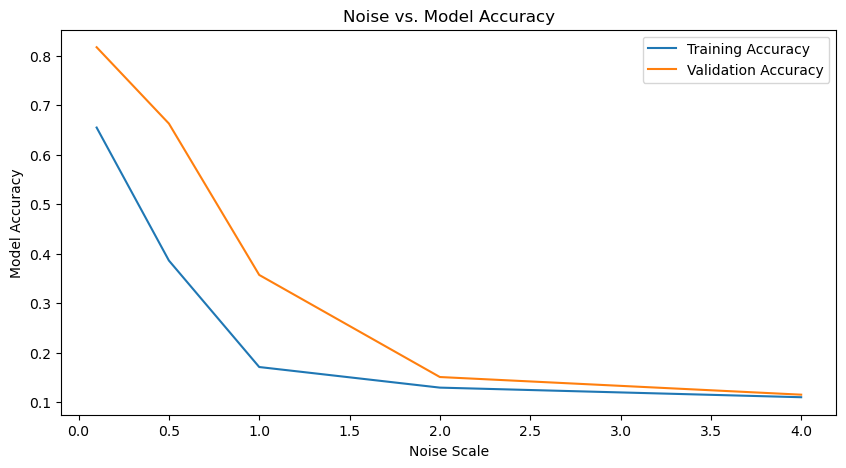

In [15]:
#Question #3

#Define parameters for batch_size, num_classes, and epochs
batch_size = 128
num_classes = 10
epochs = 12

#Define noise parameter
noise_scales = [0.1, 0.5, 1.0, 2.0, 4.0]

#Create lists to store accuracy values for both the training and validation sets
accuracy_training = []
accuracy_validation = []

#Define loop that applies noise to training and testing sets for each scale in noise_scales + runs Convolution Network to assess model accuracy as it relates to that specific noise level
for scale in noise_scales:
    # Apply noise to training and testing data
    noise_x_train = noise(x_train, scale)
    noise_x_test = noise(x_test, scale)

    #Define the model
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    #Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    #Train the model on noise_x_train + y_train & defined parameters + utilize validation data to see how well the model performed on unseen data (noise_x_test & y_test)
    evaluation = model.fit(noise_x_train, y_train,
                           batch_size=128, epochs=12, verbose=0,
                           validation_data=(noise_x_test, y_test))

    #Obtain accuracies for training and validation and append them to their respective list
    accuracy_training.append(evaluation.history['accuracy'][-1])
    accuracy_validation.append(evaluation.history['val_accuracy'][-1])

#Plot the results + analyze the results
plt.figure(figsize=(10, 5))
plt.plot(noise_scales, accuracy_training, label='Training Accuracy')
plt.plot(noise_scales, accuracy_validation, label='Validation Accuracy')
plt.title('Noise vs. Model Accuracy')
plt.xlabel('Noise Scale')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

In [19]:
print("""Relative to the accuracy metric associated with the multilayer perceptron, convolution networks as trained above seemed to perform very poorly when noise is introduced/integrated with an image. The validation accuracy falls to < 20% when the noise scale reaches 1.0. In comparison, the validation accuracy associated with the multilayer perceptron falls to 20% when the noise scale reached 4.0""")

Relative to the accuracy metric associated with the multilayer perceptron, convolution networks as trained above seemed to perform very poorly when noise is introduced/integrated with an image. The validation accuracy falls to < 20% when the noise scale reaches 1.0. In comparison, the validation accuracy associated with the multilayer perceptron falls to 20% when the noise scale reached 4.0
